In [69]:
#import numpy, pandas, matplotlib.pyplot, seaborn, and datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

#load data with provided code snippet
filename = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'
df  = pd.read_csv(filename) 

In [103]:
#sanity check data loaded correctly
print(df.shape,'\n')
# with statment to override summary and get full width of data
with pd.option_context('display.max_columns', 21):
    display(df.head())
    

(20000, 21) 



,Year,Month,Day,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,40.0,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,45.0,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,48.0,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,39.0,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,44.0,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [160]:
display(df.describe())

,Year,Month,Day,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,20000.0,20000.000000,20000.000000,20000.000000,19785.000000,19766.000000,20000.000000,19738.000000,19738.000000,19738.000000,19785.000000,20000.000000,19766.000000,19780.000000,20000.000000,20000.000000
mean,2011.0,1.054500,16.319000,4.020300,1396.328228,1586.669382,1626.416900,126.795319,105.584355,5.205340,8.297700,772.899550,6.076546,15.134328,0.011200,0.001900
std,0.0,0.227007,9.025692,2.096904,441.598739,458.489922,1142.067143,60.158125,57.655970,25.383494,23.934218,458.640531,4.085732,7.046056,0.105238,0.043549
min,2011.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,23.000000,-49.000000,-18.000000,127.000000,1.000000,4.000000,0.000000,0.000000
25%,2011.0,1.000000,8.000000,2.000000,1026.000000,1224.250000,582.000000,74.000000,54.000000,-8.000000,-3.000000,351.000000,4.000000,10.000000,0.000000,0.000000
50%,2011.0,1.000000,17.000000,4.000000,1416.000000,1620.000000,1644.000000,123.000000,102.000000,0.000000,1.000000,787.000000,5.000000,14.000000,0.000000,0.000000
75%,2011.0,1.000000,25.000000,6.000000,1801.000000,1955.000000,2536.000000,162.000000,138.000000,11.000000,10.000000,1034.000000,7.000000,18.000000,0.000000,0.000000
max,2011.0,2.000000,31.000000,7.000000,2335.000000,2400.000000,7037.000000,539.000000,499.000000,775.000000,780.000000,3904.000000,140.000000,78.000000,1.000000,1.000000


# Project 1

### questions?

#### looking into arrival and departure delay.
     1. are Arrival and Departure delays related
     1. Are delays different by day of the week
     1. which airline has the worst delays 
        * the highest ratio of flight delay
        * the longest on average
  

### Necessary objectives

1. Questions( see above)
2. Data transformations
2. Exploratory data analysis


#### potential transformations
1. exclude diverted and canceled flights from analysis:
3. create field that is ratio of ArrDelay and flight time to look at magnitude of delay 
3. create simplified dataframe containing only necessary columns 

In [225]:
#subset data select nessasary columns and filter out canceled or diverted flights

df_sub = df.loc[(df['Cancelled'] == 0) | (df['Diverted']==0),['DayOfWeek','Dest','UniqueCarrier','ArrDelay','DepDelay']]



#create datetime column first set day of month to 'DAY' to make process easier

df.rename(columns={'DayofMonth':'Day'},inplace=True)

# pandas todate function 
df_sub['Date'] = pd.to_datetime(df[['Year','Month','Day']])

# create a ratio of the Arr_delay and total time of flight as mag

df_sub['Delay_Ratio'] = df.ArrDelay/df.ActualElapsedTime

# date wont be utlized as data is incomplete but this process would be helpfull to look at data over time given full dataset
                                                              
#sanity check of new datafram
df_sub.head()

,DayOfWeek,Dest,UniqueCarrier,ArrDelay,DepDelay,Date,Delay_Ratio
0,6,DFW,AA,-10.0,0.0,2011-01-01,-0.166667
1,7,DFW,AA,-9.0,1.0,2011-01-02,-0.150000
2,1,DFW,AA,-8.0,-8.0,2011-01-03,-0.114286
3,2,DFW,AA,3.0,3.0,2011-01-04,0.042857
4,3,DFW,AA,-3.0,5.0,2011-01-05,-0.048387


## first exploratory data analysis
    what does the ArrDelay look like?  Departure deylay?
    how is it distributed?
        generally
        by airline
        by day of the week
        
   #### general distribution:
    to look at distribution we will utilize a histogram
    bins - were first set with square rule (sqrt(len(data))) then reduced to 100 by observation 
    range set manually to exclude outliers 

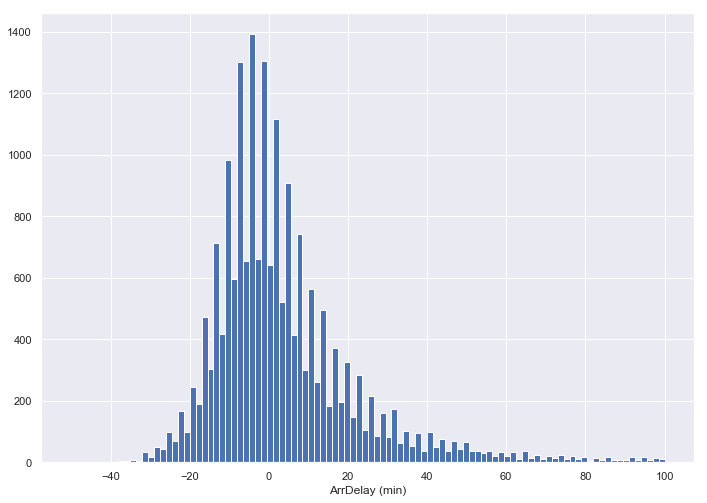

In [112]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

_ = plt.hist(df_sub['ArrDelay'],range =(-50,100),bins =100);
_ =plt.xlabel('ArrDelay (min)');

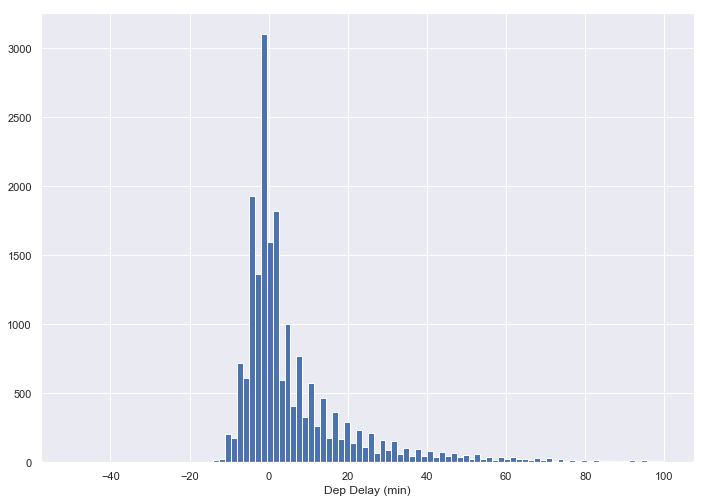

In [96]:
_ = plt.hist(df_sub.DepDelay,range = (-50,100), bins = 100)
_ = plt.xlabel('Dep Delay (min)');

### Observations and next steps

####        Observations
            * arrival delays appear to be fairly evenly distributed while departure delays are right skewed. 
            * both data sets contain -negative numbers. meaning that early departures and arrivals are considered negative delay.
              this will have to be accounted for further numerical analysis
            * 19% of flights have a delay

####       Next by Airline:
     A boxen plot will be utlized to visualize delay  by airline.
A description of a boxen plot from the seaborn website: 
>Draw an enhanced box plot for larger datasets.
>
>This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails. For a more extensive explanation, you can read the paper that introduced the plot:
https://vita.had.co.nz/papers/letter-value-plot.html


max value set to 300 to get a better sense of typical delay without outliers 


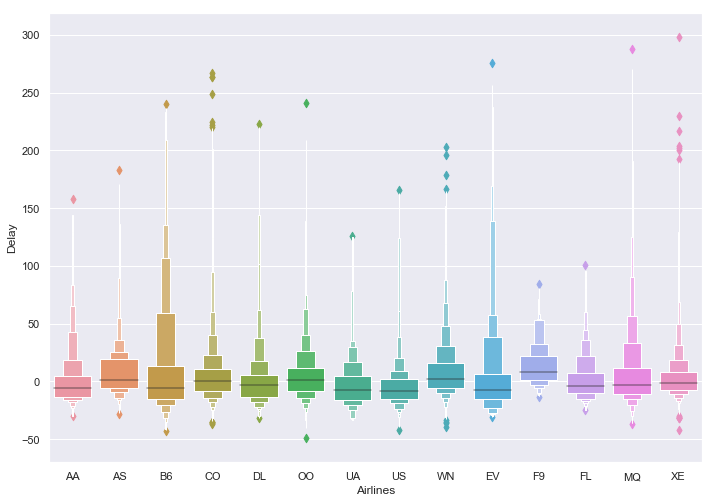

In [107]:
_ = sns.boxenplot(x='UniqueCarrier',y  = 'ArrDelay', data = df_sub.loc[(df.ArrDelay<300),['UniqueCarrier','ArrDelay']])
_ = plt.xlabel('Airlines')
_ = plt.ylabel('Delay')                                       

### Observations and next steps
####        Observations
    * from this plot we see that most airlines median Arr delay is at or near 0

#### next steps
    we will next look at the distribution of ArrDelays by Day of the week 

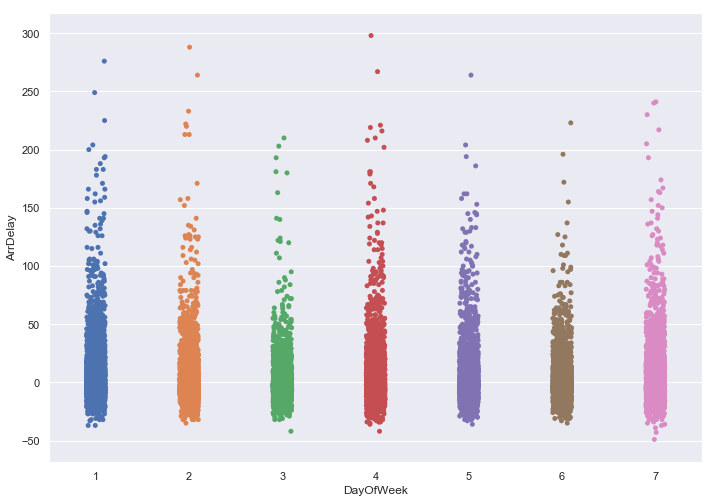

In [110]:
sns.stripplot(x = 'DayOfWeek',y = 'ArrDelay',data= df_sub[df_sub.ArrDelay <300], jitter=True);

In [ ]:
dayofweek_group = df_sub.groupby('DayOfWeek')

### Conclusions 
we see that day 1 and 4 seem to have the most delays while day 3 and 6 have the least

### next steps

before moving on to look at delays at different airports we will visualize the relationship to validate our assumption of a positive relationship 

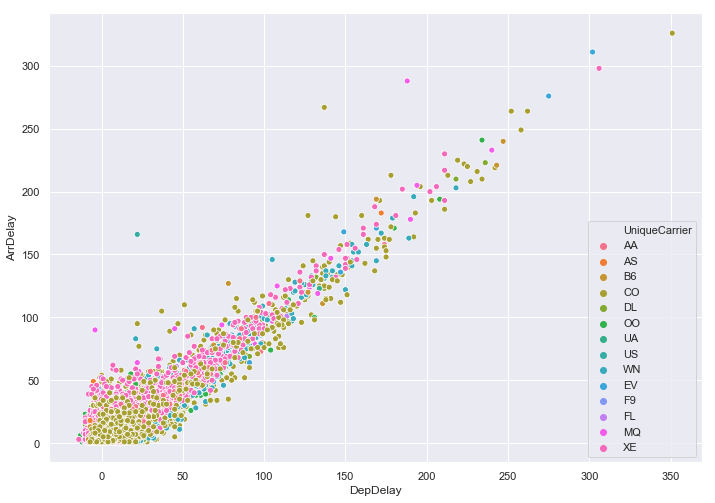

In [99]:
sns.scatterplot(x='DepDelay',y='ArrDelay',hue='UniqueCarrier', data = df_sub[ (df_sub['ArrDelay']<400) & (df_sub['ArrDelay']>0)]);

### conclusions
As one might intuitively suspect the data seems to have a positive correlation

### next 
now that we have visualized the data let us look at the numbers

In [181]:
# summary statistics 
display(df_sub[['ArrDelay','DepDelay','Delay_Ratio']].aggregate(['mean','median','std','min','max']))


# percent of flights that are have a delay defined as depature delay > 15 min
print(f'the percent of flights that have a delay is  {round(df_sub.loc[df_sub.ArrDelay >15,"ArrDelay"].count()/df_sub.ArrDelay.count(),3)}%')
# avegerage magnituted of delay 
print(f'the average delay is {round(df_sub.Delay_Ratio[df_sub.ArrDelay>15].mean(),3)}% the total flight time')            

,ArrDelay,DepDelay,Delay_Ratio
mean,5.205340,8.297700,0.046604
median,0.000000,1.000000,0.000000
std,25.383494,23.934218,0.254113
min,-49.000000,-18.000000,-0.976744
max,775.000000,780.000000,5.098684


the percent of flights that have a delay is  0.19%
the average delay is 0.381% the total flight time


### by airline 
now that we no a little more about the delay in general we will break it down by airline

steps:
   * add column to indicate whether flight is delayed more than 15 min to aid in aggregation 
   * group data by Airline 
   * generate summary statistics
   * generate Percent of flights delayed
   * generate Average magnitude(percent of total flying time delayed)
  

In [224]:
#add 1 if flight is delayed more than 15 mins to make agg easier
df_sub.loc[(df_sub.ArrDelay>15),'Delayed'] = 1

# create group by airline
airline_group = df_sub.groupby('UniqueCarrier')

#summary satsticts of ArrDelay by airline
display(airline_group['ArrDelay'].aggregate(['count','mean','median','std','min','max']))

#create summary table of delays
Delay_count = airline_group['ArrDelay','Delayed'].count()

#add ratio column
Delay_count['Percentage']= Delay_count.Delayed/Delay_count.ArrDelay
# Add magnitude column
Delay_count['Average Magnitude'] = df_sub.groupby('UniqueCarrier')['Delay_Ratio'].aggregate('mean')

#sort by highest delay 
Delay_count.sort_values('Percentage', ascending = False)

,count,mean,median,std,min,max
UniqueCarrier,,,,,,
AA,504,0.950397,-6.0,23.667081,-30.0,158.0
AS,58,9.396552,1.0,29.397422,-28.0,183.0
B6,93,11.086022,-6.0,51.550451,-43.0,240.0
CO,6767,5.366780,0.0,27.310094,-37.0,775.0
DL,238,4.310924,-3.0,43.067947,-32.0,487.0
EV,96,13.927083,-6.5,70.571389,-31.0,445.0
F9,62,13.725806,8.0,19.297642,-13.0,84.0
FL,133,1.624060,-4.0,19.112348,-25.0,101.0
MQ,325,7.144615,-3.0,36.341496,-37.0,288.0


,ArrDelay,Delayed,Percentage,Average Magnitude
UniqueCarrier,,,,
F9,62,21,0.338710,0.090653
AS,58,18,0.310345,0.030061
WN,3667,943,0.257158,0.119240
MQ,325,70,0.215385,0.051802
B6,93,20,0.215054,0.049912
OO,689,144,0.208999,0.044380
EV,96,19,0.197917,0.095480
CO,6767,1331,0.196690,0.033391
FL,133,21,0.157895,0.010862


### Final conclusions

while the number of data points varies wildly by Carrier in this data set we can see significant and noticeable trends in delay when looked at by carrier.

key takeaways: 
    stay off don't book F9 AsS or WN